In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import joblib
import os

In [17]:
# Multiple Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Create directory for models if it doesn't exist
os.makedirs("train_models", exist_ok=True)


In [19]:
# Loading the dataset
df = pd.read_csv("dataset/survey_lung_cancer.csv")
print("Original data shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Original data shape: (309, 16)

First few rows:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCE

In [20]:
# Data cleaning and standardization on the column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df.rename(columns={"lung_cancer": "target"}, inplace=True)

print("\n" + "="*60)
print("ENCODING DATA")
print("="*60)


ENCODING DATA


In [21]:
categorical_columns = ['gender', 'smoking', 'yellow_fingers', 'anxiety', 
                       'peer_pressure', 'chronic_disease', 'fatigue', 
                       'allergy', 'wheezing', 'alcohol_consuming', 
                       'coughing', 'shortness_of_breath', 
                       'swallowing_difficulty', 'chest_pain', 'target']

In [22]:
# ✅ SOLUTION: Save each encoder separately
encoders = {}
for col in df.columns:
    if col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
    # Age stays as numeric - no encoding needed


In [23]:
# Print the mappings so you can see them
print("\n📋 Encoding Mappings:")
for col, encoder in encoders.items():
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f"{col}: {mapping}")
print(f"age: [numeric - no encoding]")

print("\nEncoded data:")
print(df.head())


📋 Encoding Mappings:
gender: {'F': np.int64(0), 'M': np.int64(1)}
smoking: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
yellow_fingers: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
anxiety: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
peer_pressure: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
chronic_disease: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
fatigue: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
allergy: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
wheezing: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
alcohol_consuming: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
coughing: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
shortness_of_breath: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
swallowing_difficulty: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
chest_pain: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
target: {'NO': np.int64(0), 'YES': np.int64(1)}
age: [numeric - n

In [24]:
# Separate features from target
X = df.drop('target', axis=1)
y = df['target']
print("\n" + "="*60)
print("DATASET SPLIT")
print("="*60)
print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Target distribution:")
print(y.value_counts())


DATASET SPLIT
Feature shape: (309, 15)
Target shape: (309,)
Target distribution:
target
1    270
0     39
Name: count, dtype: int64


In [25]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print("\nTrain size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (231, 15)
Test size: (78, 15)


StandardScaler transforms your features to have zero mean and unit variance, putting all variables on the same scale for machine learning.
- StandardScaler: Most common, assumes normal distribution
- MinMaxScaler: When you need specific bounds (e.g., for neural networks)
- RobustScaler: When your cancer data has outliers or isn't normally distributed

In [26]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
print("\n" + "="*70)
print("TRAINING AND COMPARING MULTIPLE MODELS")
print("="*70)

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}


TRAINING AND COMPARING MULTIPLE MODELS


In [31]:
# Store results



results = []
best_accuracy = 0
best_model_name = ""
best_model = None

print("\n{:<25} {:<12} {:<12} {:<12}".format("Model", "Accuracy", "CV Score", "ROC-AUC"))
print("-" * 70)

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    cv_mean = cv_scores.mean()
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 0
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'CV_Score': cv_mean,
        'ROC_AUC': roc_auc
    })
    
    # Print results
    print("{:<25} {:<12.4f} {:<12.4f} {:<12.4f}".format(
        name, accuracy, cv_mean, roc_auc
    ))
    
    # Track best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model

print("=" * 70)
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"✅ Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")



Model                     Accuracy     CV Score     ROC-AUC     
----------------------------------------------------------------------
Logistic Regression       0.9103       0.9349       0.9500      
Random Forest             0.9231       0.9133       0.9610      
Gradient Boosting         0.8718       0.8787       0.9412      
SVM                       0.8846       0.9046       0.9426      
Neural Network            0.8974       0.9090       0.8735      
Decision Tree             0.8974       0.8875       0.8559      
KNN                       0.8974       0.9090       0.9206      

🏆 BEST MODEL: Random Forest
✅ Accuracy: 0.9231 (92.31%)


In [32]:
# Detailed report for best model
print("\n" + "="*70)
print(f"DETAILED REPORT FOR {best_model_name}")
print("="*70)

y_pred_best = best_model.predict(X_test_scaled)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_best))



DETAILED REPORT FOR Random Forest

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.97      0.94      0.96        68

    accuracy                           0.92        78
   macro avg       0.82      0.87      0.84        78
weighted avg       0.93      0.92      0.93        78



Text(95.72222222222221, 0.5, 'Actual')

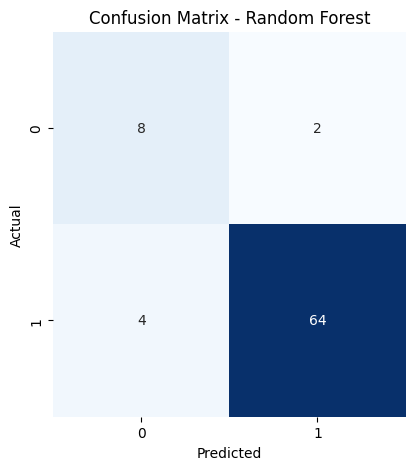

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")


📊 Charts saved as 'train_models/model_comparison.png'


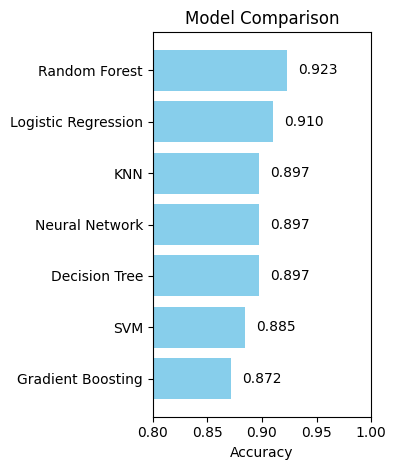

In [34]:
# Model comparison chart
plt.subplot(1, 2, 2)
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=True)
plt.barh(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim(0.8, 1.0)
for i, v in enumerate(results_df['Accuracy']):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.savefig("train_models/model_comparison.png")
print("\n📊 Charts saved as 'train_models/model_comparison.png'")
plt.show()

**Why Two Models Are Needed:**
So scaler is the data preparation helper that makes data ready for the main model!
1. **`lung_cancer_model.pkl`** - Main prediction model
   - Makes actual cancer predictions
   - Contains learned patterns from training data

2. **`scaler.pkl`** - Data preprocessor  
   - Converts new data to same scale as training data
   - Ensures model gets consistent input format

**They work together:**
```python
New Data → Scaler → Scaled Data → Model → Prediction
```

**Without scaler:** Model performance drops because it expects scaled inputs but gets raw data.

In [35]:
# Save the best model
print("\n" + "="*70)
print("SAVING BEST MODEL")
print("="*70)

joblib.dump(best_model, "train_models/lung_cancer_model.pkl")
joblib.dump(scaler, "train_models/scaler.pkl")
joblib.dump(encoders, "train_models/encoders.pkl")
joblib.dump(categorical_columns, "train_models/categorical_columns.pkl")
joblib.dump(best_model_name, "train_models/best_model_name.pkl")

print(f"✅ Best Model ({best_model_name}) saved: train_models/lung_cancer_model.pkl")
print("✅ Scaler saved: train_models/scaler.pkl")
print("✅ Encoders saved: train_models/encoders.pkl")
print("✅ Categorical columns saved: train_models/categorical_columns.pkl")
print("\n🎉 Training completed successfully!")



SAVING BEST MODEL
✅ Best Model (Random Forest) saved: train_models/lung_cancer_model.pkl
✅ Scaler saved: train_models/scaler.pkl
✅ Encoders saved: train_models/encoders.pkl
✅ Categorical columns saved: train_models/categorical_columns.pkl

🎉 Training completed successfully!


In [36]:
results_df.to_csv("train_models/model_comparison_results.csv", index=False)
print("✅ Results summary saved: train_models/model_comparison_results.csv")

✅ Results summary saved: train_models/model_comparison_results.csv
